## Ch 5.1. Multilayer Perceptrons

https://d2l.ai/chapter_multilayer-perceptrons/mlp.html

In [1]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

#### 5.1.2.1. ReLU Function

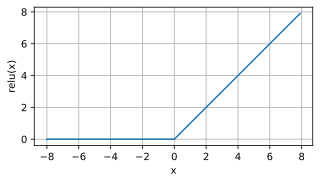

In [2]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'relu(x)', figsize=(5, 2.5))

Gradient of the ReLU function. 

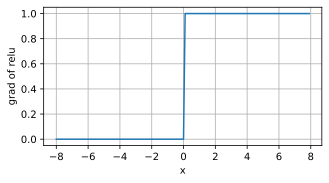

In [3]:
with tf.GradientTape() as t:
    y = tf.nn.relu(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of relu',
         figsize=(5, 2.5))

sigmoid function: 

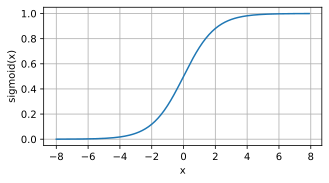

In [4]:
y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

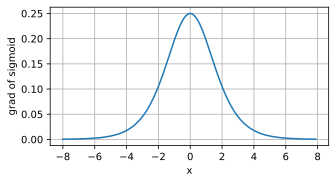

In [5]:
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of sigmoid',
         figsize=(5, 2.5))

Tanh Function

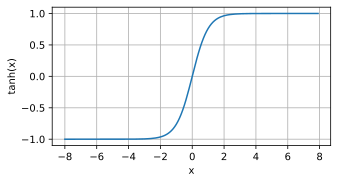

In [6]:
y = tf.nn.tanh(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'tanh(x)', figsize=(5, 2.5))

### 5.2.1. Implementation of Multilayer Perceptrons

In [7]:
import tensorflow as tf
from d2l import tensorflow as d2l

5.2.1.1. Initializing Model Parameters

In [8]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(
            tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(
            tf.random.normal((num_hiddens, num_outputs)) * sigma)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

In [9]:
def relu(X):
    return tf.math.maximum(X, 0)

In [10]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

### 5.2.1.3. Training

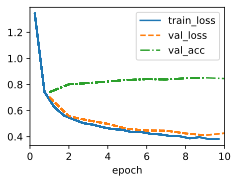

In [11]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementation

In [12]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_outputs)])

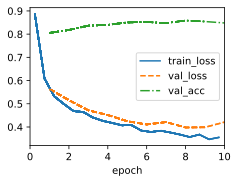

In [13]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

## 5.4. Numerical Stability

In [14]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

Vanishing Gradients

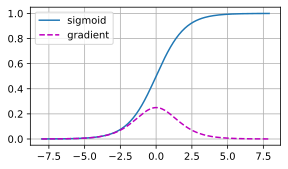

In [15]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1))
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), [y.numpy(), t.gradient(y, x).numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

Exploding Gradients

In [16]:
M = tf.random.normal((4, 4))
print('a single matrix \n', M)
for i in range(100):
    M = tf.matmul(M, tf.random.normal((4, 4)))
print('after multiplying 100 matrices\n', M.numpy())

a single matrix 
 tf.Tensor(
[[ 0.8272834   0.15126716  0.6188734  -1.7463973 ]
 [ 0.40428823 -0.96550983 -0.03731977 -0.8064392 ]
 [-0.80450994  0.46944174  0.49519223 -0.06835134]
 [-0.13817725 -0.27079308 -1.5125273   0.3702596 ]], shape=(4, 4), dtype=float32)
after multiplying 100 matrices
 [[ 2.65667883e+27  1.95106401e+27  1.11456334e+27 -2.45571026e+26]
 [ 1.44905653e+27  1.06418691e+27  6.07926692e+26 -1.33944170e+26]
 [-2.84395040e+26 -2.08859681e+26 -1.19313033e+26  2.62881783e+25]
 [-1.15756473e+26 -8.50115157e+25 -4.85636133e+25  1.06999970e+25]]


## 5.5. Generalization in Deep Learning

## 5.6 Dropout

In [17]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return tf.zeros_like(X)
    mask = tf.random.uniform(
        shape=tf.shape(X), minval=0, maxval=1) < 1 - dropout
    return tf.cast(mask, dtype=tf.float32) * X / (1.0 - dropout)

In [47]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tf.Tensor(
[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]], shape=(2, 8), dtype=float32)
dropout_p = 0.5: tf.Tensor(
[[ 0.  0.  4.  6.  0.  0.  0.  0.]
 [ 0.  0. 20.  0. 24.  0.  0.  0.]], shape=(2, 8), dtype=float32)
dropout_p = 1: tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 8), dtype=float32)


Defining the Model

In [48]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = tf.keras.layers.Dense(num_hiddens_1, activation='relu')
        self.lin2 = tf.keras.layers.Dense(num_hiddens_2, activation='relu')
        self.lin3 = tf.keras.layers.Dense(num_outputs)

    def forward(self, X):
        H1 = self.lin1(tf.reshape(X, (X.shape[0], -1)))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.lin2(H1)
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

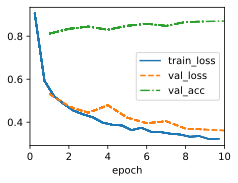

In [49]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.6.3. Concise Implementation

In [53]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens_1, activation=tf.nn.relu),
            tf.keras.layers.Dropout(dropout_1),
            tf.keras.layers.Dense(num_hiddens_2, activation=tf.nn.relu),
            tf.keras.layers.Dropout(dropout_2),
            tf.keras.layers.Dense(num_outputs)])

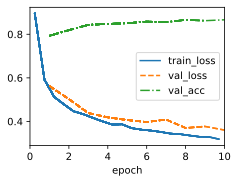

In [54]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

## 5.7 Predicting House Prices on Kaggle

In [55]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
from d2l import tensorflow as d2l

Downloading data

In [56]:
def download(url, folder, sha1_hash=None):
    """Download a file to folder and return the local filepath."""

def extract(filename, folder):
    """Extract a zip/tar file into folder."""

In [57]:
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

In [58]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


### 5.7.4. Data Preprocessing

In [59]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [60]:
@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes!='object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [61]:
data.preprocess()
data.train.shape

(1460, 331)

### 5.7.5 Error Measure

In [62]:
@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: tf.constant(x.values, dtype=tf.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               tf.reshape(tf.math.log(get_tensor(data[label])), (-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

In [63]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

In [64]:
def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

average validation log mse = 0.17694157540798186


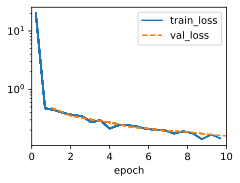

In [65]:
trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)

In [66]:
preds = [model(tf.constant(data.val.values, dtype=tf.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = tf.reduce_mean(tf.exp(tf.concat(preds, 1)), 1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.numpy()})
submission.to_csv('submission.csv', index=False)